In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

cleaned = pd.read_csv('../cleaned_airbnb.csv')

x = cleaned.drop('price', axis=1) # Features: city, country, state, bathrooms, bedrooms, beds, guests
y = cleaned['price'] # Target Variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=28)

categorical_features = ['city', 'state/province', 'country']

encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# *=== Data Transformation - Encoding Categorical Data [City, State, Country] ===* #

encoded_train = encoder.fit_transform(x_train[categorical_features])
encoded_test = encoder.transform(x_test[categorical_features])

encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(categorical_features))
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(categorical_features))

x_train_encoded = x_train.drop(categorical_features, axis=1).reset_index(drop=True)
x_test_encoded = x_test.drop(categorical_features, axis=1).reset_index(drop=True)

x_train_final = pd.concat([x_train_encoded, encoded_train_df], axis=1)
x_test_final = pd.concat([x_test_encoded, encoded_test_df], axis=1)

# * === Random Forest Regression === * #
model = RandomForestRegressor(n_estimators=20, random_state=50)
model.fit(x_train_final, y_train)

y_pred = model.predict(x_test_final)

/Users/adalysg/Desktop/CAP/CAP_group5/the-env/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [2]:
# *=== Evaluation Metrics ===* #

mean_price = cleaned['price'].mean() # for understanding RMSE

# rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R2: {r2}") # R2 of 1 indicates best fit
print(f"MAE: {mae}")

R2: 0.4570751646092962
MAE: 4458.676558579069


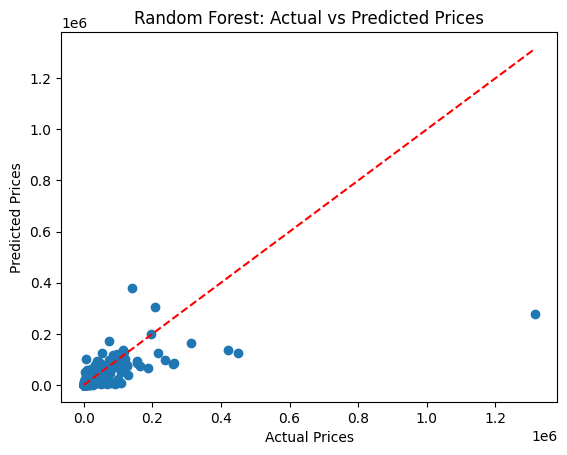

In [3]:
# * === Visualization - Scatterplot === * #

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')